# Measurement Noise Mitigation in a Quantum Computer Using Image Intensity Filters
We propose a method to mitigate measurement errors in the distribution counts of a Quantum computer using image contrast filters. This work is similar to the method described by Gambetta and colleagues in [1]; however our technique does not use a linear system of equations, but an image contrast filter to mitigate the measurement noise. Furthermore this method is demonstrated against the same set of experiments described in the matrix-free measurement mitigation (M3) library from Qiskit from which [1] is based upon. Our results show our method outperforming M3 by a wide margin in all experiments.

Consider the first Greenberger–Horne–Zeilinger (GHZ) state describing a 3 qubit entanglement  |ѱ⟩=1/√2 (|000⟩ + |111⟩) 

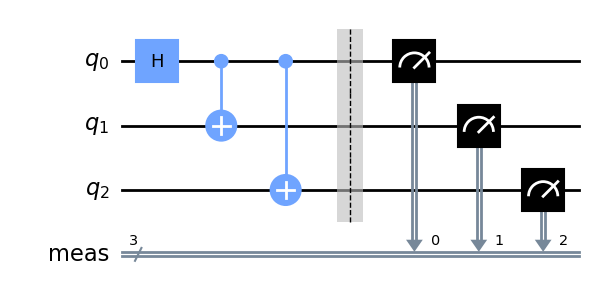

{'000': 1021, '111': 939, '010': 8, '110': 31, '011': 17, '100': 3, '001': 11, '101': 18}


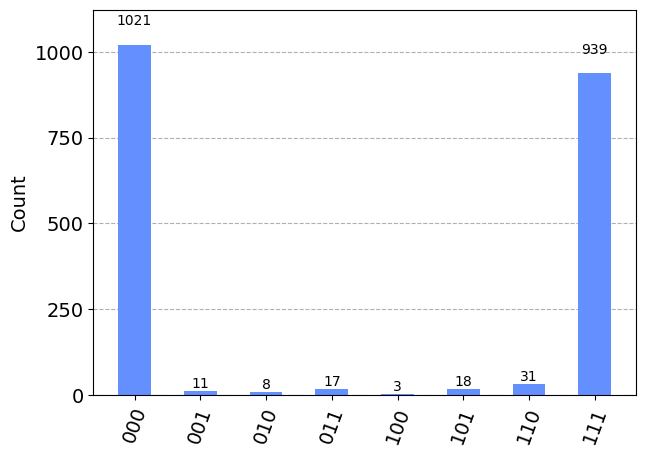

In [1]:
from qiskit import *
from qiskit.visualization import *
from qiskit.providers.fake_provider import *

n = 3

qc = QuantumCircuit(n)
qc.h(0)
qc.cx(0,1)
qc.cx(0,2)

qc.measure_all()

display(qc.draw())

backend = FakeGuadalupe() 
#backend = Aer.get_backend('qasm_simulator')

shots = 2048
res = execute(qc, backend, shots=shots).result()

counts= res.get_counts()

print (counts)

plot_histogram(counts)

Take the measurement results of the experiment in figure 1 and construct a probability distribution by dividing each result count by the number of “shots” or measurements in the device. Map those probabilities to pixels in a Grayscale image. This allows for image manipulation and display.

Probabilities: {'000': 0.49853515625, '111': 0.45849609375, '010': 0.00390625, '110': 0.01513671875, '011': 0.00830078125, '100': 0.00146484375, '001': 0.00537109375, '101': 0.0087890625}
Pixels [0.49853515625, 0.45849609375, 0.00390625, 0.01513671875, 0.00830078125, 0.00146484375, 0.00537109375, 0.0087890625]


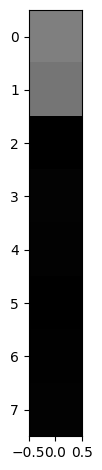

In [7]:
# Prepare image: convert probs to pixels & display
from skimage import data, io, filters,exposure
import matplotlib.pyplot as plt
import numpy as np

# counts to probs
probs = {key:count/shots for key,count in counts.items()}
print ('Probabilities: ' + str(probs))

# probs -> pixels -> image
dim = len(probs)
pixels = [val for key,val in probs.items()]
img = np.ndarray(shape=(dim,1), dtype=float)

for col in range(dim):
    img[col] = pixels[col]

print ('Pixels ' + str(pixels))
io.imshow(img)

Next, apply a contrast filter to increase the separation between the darkest (low or noisy) and brightest areas of the image. The effect can be easily visualized. Note that after the intensity rescaling step, the results need to be re-normalized resulting in a new distribution.

Probabilities after filter: [0.49844166 0.45584691 0.         0.         0.         0.
 0.         0.        ]


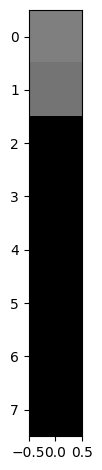

In [8]:
# apply Image filter
import mitigation as mitigation

in_range = (0.03, 0.97)
img_contrast = mitigation.rescale_intensity(img, in_range=in_range)

print('Probabilities after filter: ' + str(img_contrast.flatten()))
io.imshow(img_contrast)

Finally, map the new distribution into a new set of measurement results and compare against the original. **The noise has vitually disapeared!**

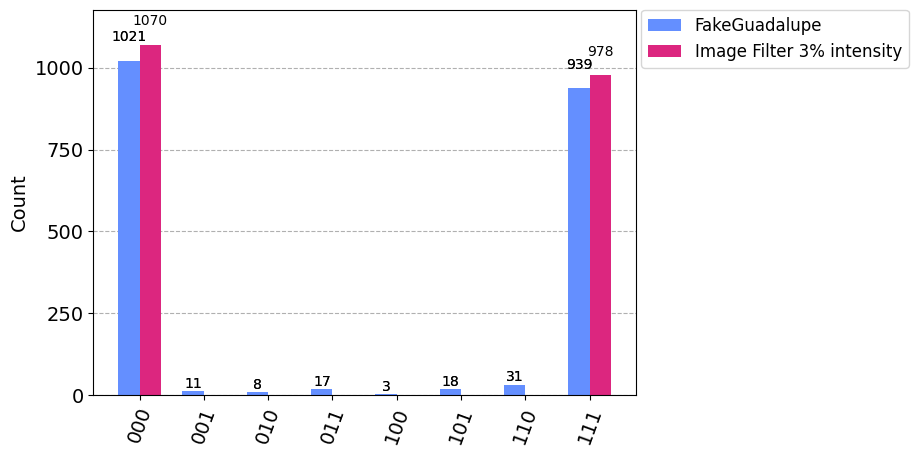

In [9]:
in_range = (0.03, 0.97) # 'image' 
probs1 = mitigation.get_probabilities(counts, shots, in_range=in_range)
counts1 = mitigation.get_counts(counts, shots, in_range=in_range)

#print (probs1)
#print (counts1)

plot_histogram([counts, counts1], legend=['FakeGuadalupe','Image Filter 3% intensity'])